**OBJECTIVE:**
> *The classification goal is to predict the likelihood of a liability customer buying Personal Loan.*



## **1.Importing the datasets and libraries, check datatype, statistical summary, shape, null values etc.**

### 1.1 Importing Necessary librararies

In [1]:
# We need python libraries such as numpy,pandas,seaborn to plot complex graphs and matplotlib for basic graphs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.2 Uploding the dataset "Bank-loan.csv file"

In [2]:
from google.colab import files 
uploaded = files.upload()
data=pd.read_csv("Bank-loan.csv")

Saving Bank-loan.csv to Bank-loan (2).csv


### 1.3 Fetching the information of the CSV file.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### 1.4 Getting the shape details of the data

In [4]:
print(data.shape)

(5000, 14)


### 1.5 Describing the data.

In [5]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### 1.6 Printing the First 5 rows from the data

In [6]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### 1.7 Displaying the last 7 rows of data

In [7]:
data.tail(7)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


### 1.8 Verifying whether any null values are present in any column

In [8]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## **2.Check if you need to clean the data for any of the variables**

### 2.1 Finding correlation score between "Age" column and "Experience" column 

In [9]:
# since age and experience are closely related we selected these 2 columns
x=data[:]['Age']
y=data[:]['Experience']
r=np.corrcoef(x,y)
print(r)
# we got 99% correlation score, we must consider only one column  of them both

[[1.         0.99421486]
 [0.99421486 1.        ]]


### 2.2 Dropping the unwanted columns

In [10]:
# "ID" is not usefuls its just an index
# "Experience" column has negatie value and we should select only one column so I choose this column
# "ZIP Code" is just and address it does not show any effect on target variable
fd=data.drop(['ID','Experience',"ZIP Code"],axis=1)
# Checking whether there is any null values present
fd.isnull().sum()

Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## **3.Exploratory Data Analysis**

### 3.1 Finding the no.of unique values present in each column

In [11]:
# This helps us to divide the columns into independent and categorical variables
fd.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

### 3.3 Finding the number of people with zero Mortgage

In [12]:
(fd.Mortgage==0).sum()

3462

### 3.4 FInding the number of people having zero Credit Card AVerage 

In [13]:
(fd.CCAvg==0).sum()

106

### 3.5 Value counts




In [14]:
fd.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [15]:
fd.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [16]:
fd["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [17]:
fd["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [18]:
fd["CD Account"].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [19]:
fd["Online"].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [20]:
fd["CreditCard"].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

### 3.5 Univariate Analysis.

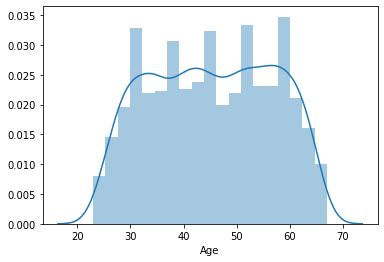

In [21]:
sns.distplot(fd.Age)
# Age seems to have symmetric ditrbution

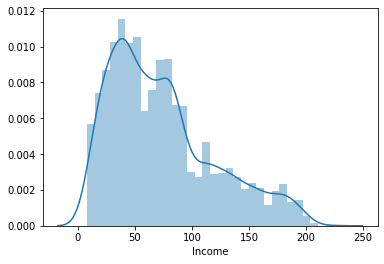

In [22]:
sns.distplot(fd.Income)
# Income seems to have right-skewed distribution

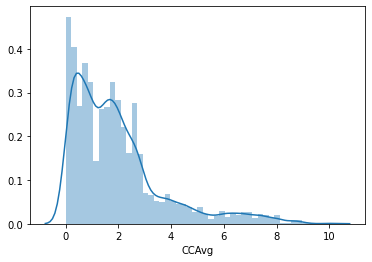

In [23]:
sns.distplot(fd.CCAvg)
# CreditCard Average Income seems to be right-skewed distibution 
# same as Income

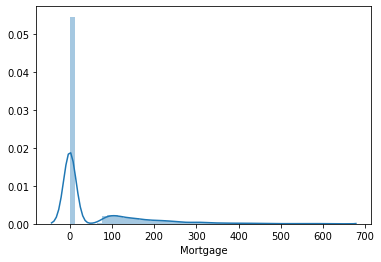

In [24]:
sns.distplot(fd.Mortgage)
# Mortgage is likely to be highly skewed distribution

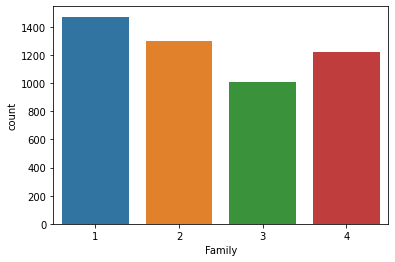

In [25]:
sns.countplot(fd.Family)

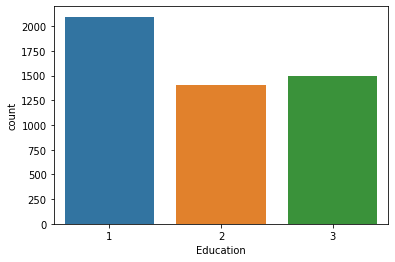

In [26]:
sns.countplot(fd.Education)

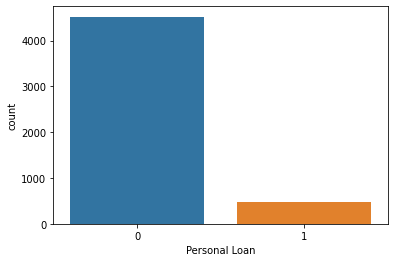

In [27]:
sns.countplot(fd["Personal Loan"])

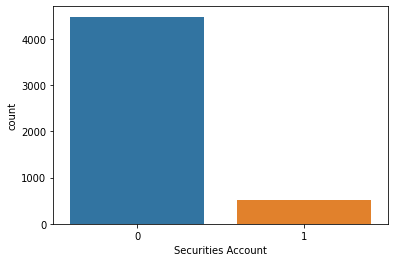

In [28]:
sns.countplot(fd["Securities Account"])

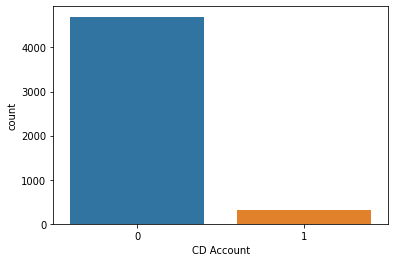

In [29]:
sns.countplot(fd["CD Account"])

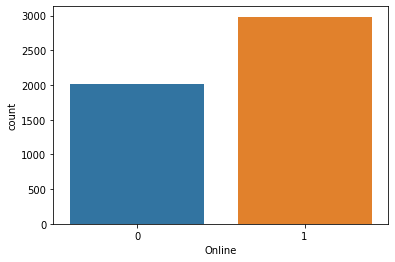

In [30]:
sns.countplot(fd["Online"])

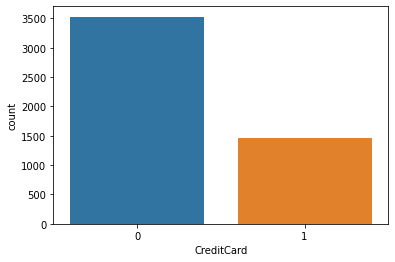

In [31]:
sns.countplot(fd["CreditCard"])

### 3.6 Bivariate Analysis

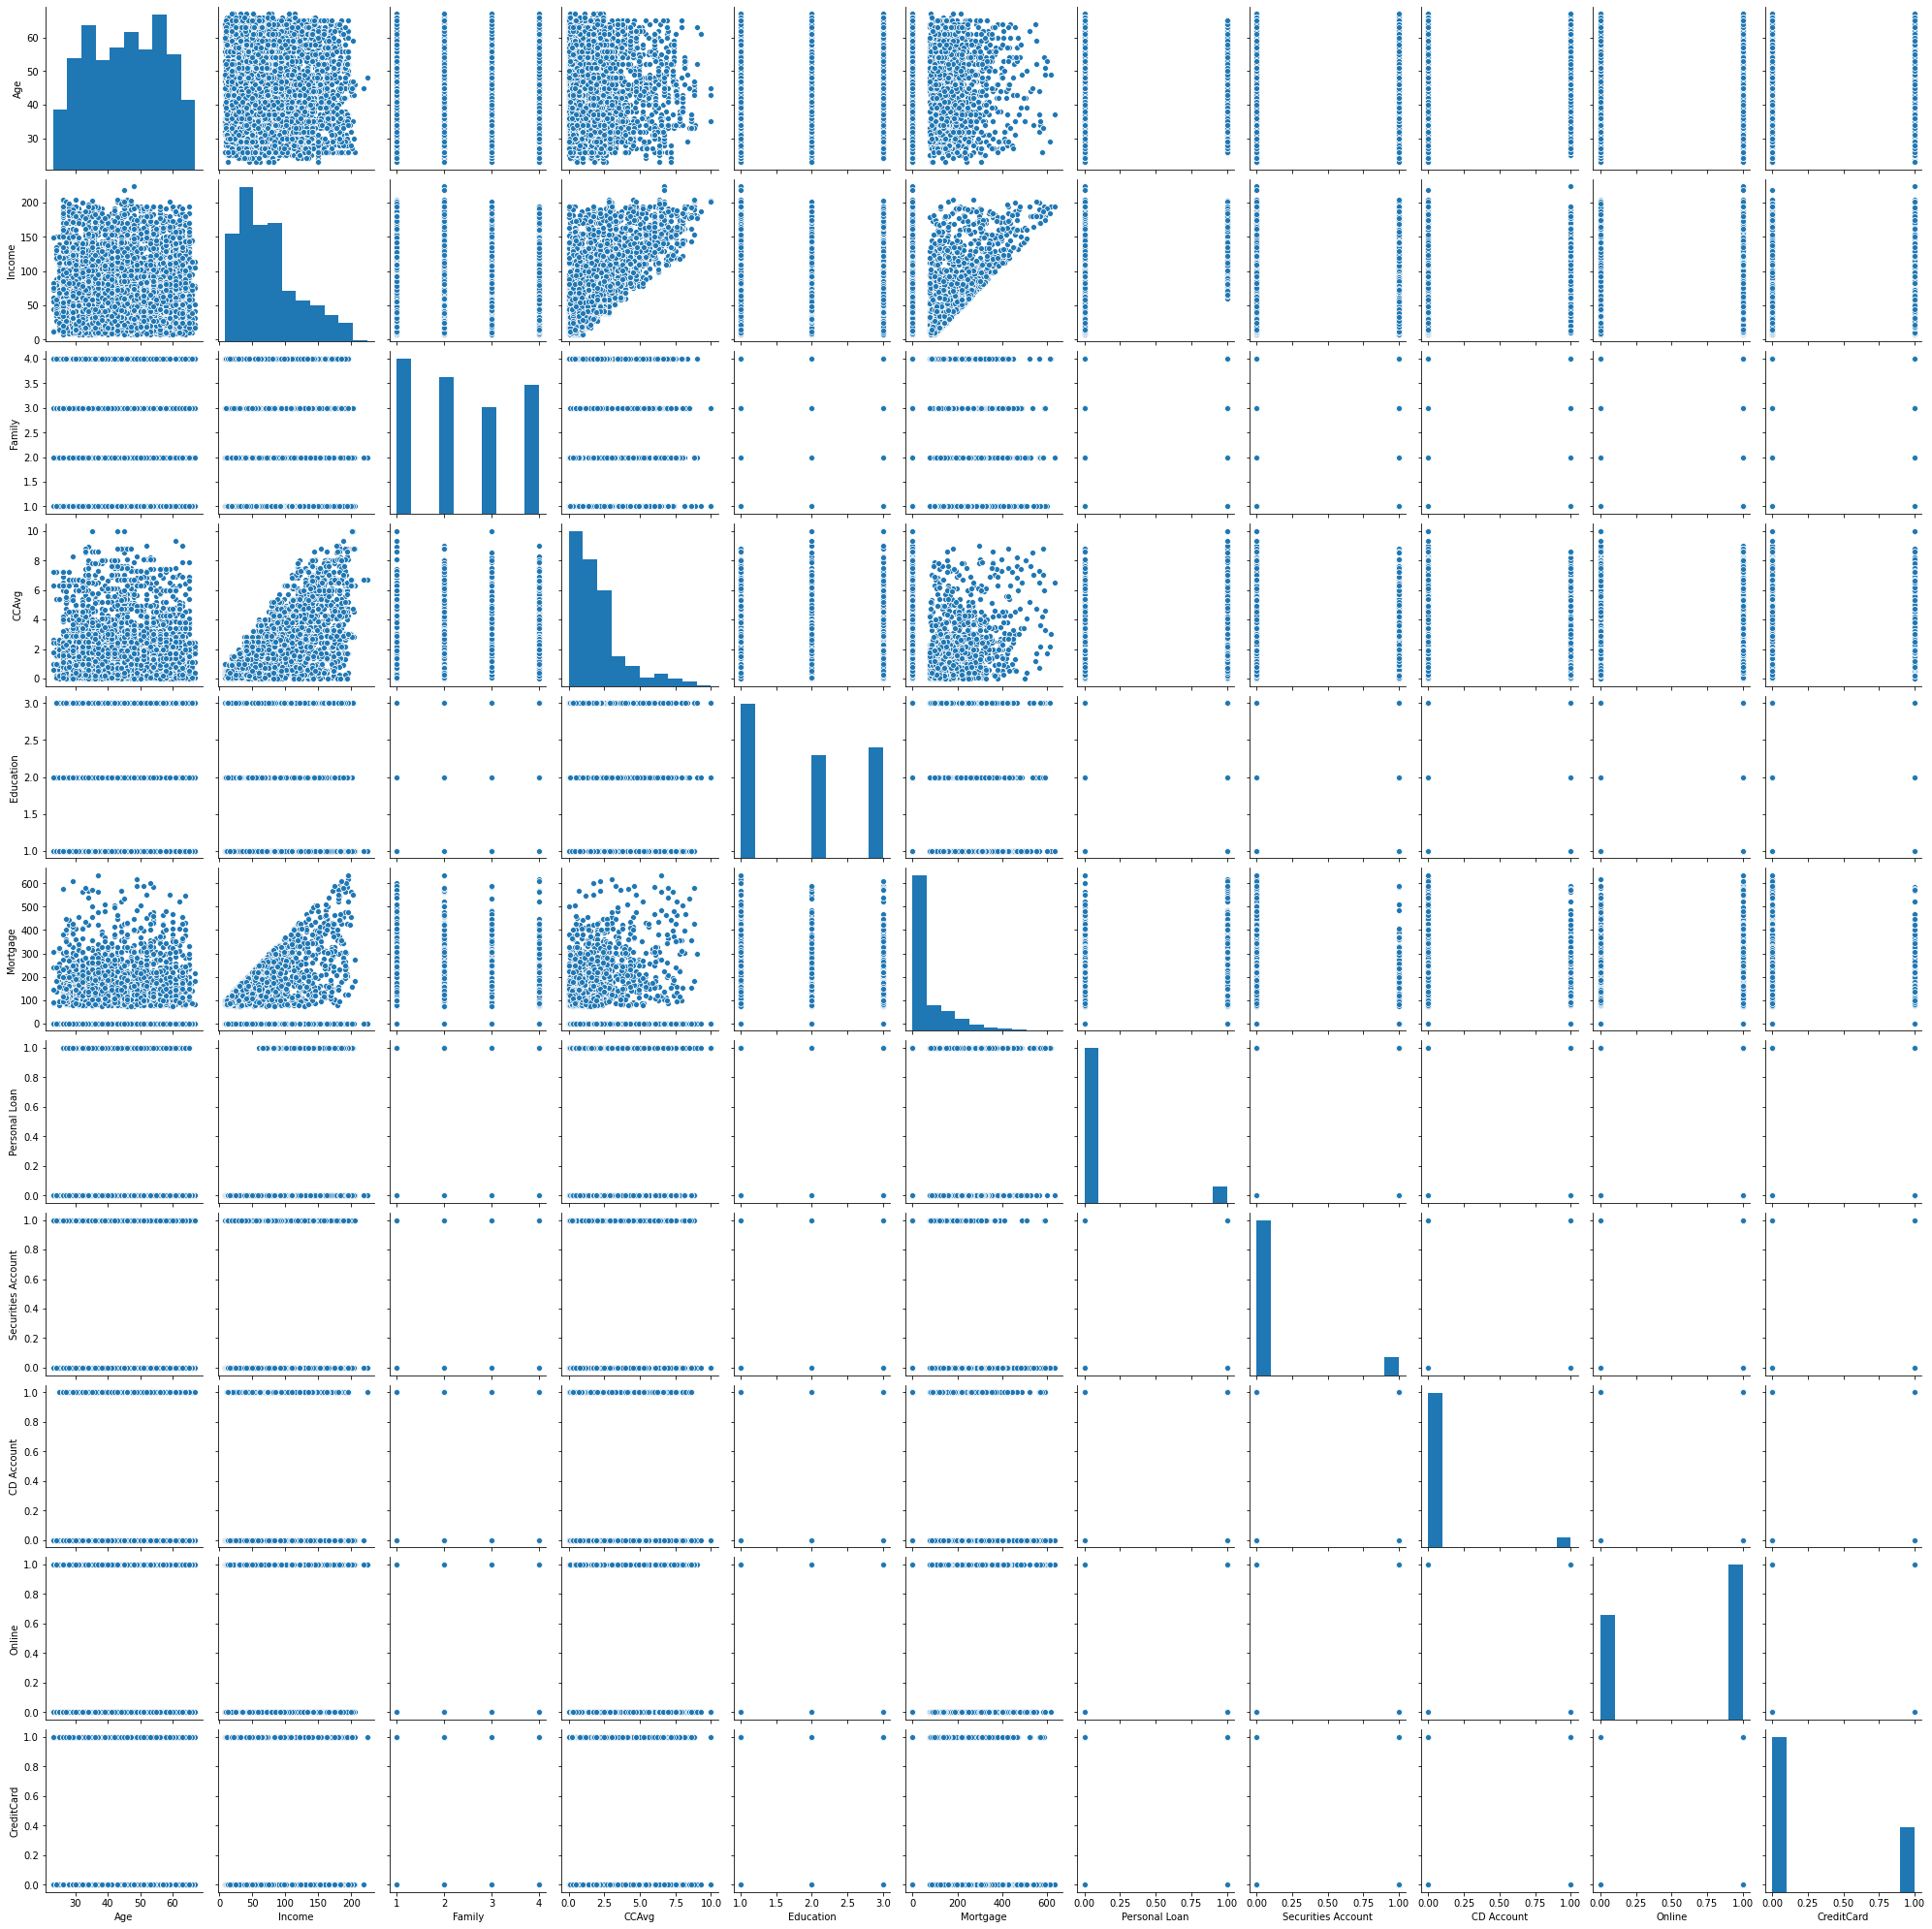

In [32]:
# pairplot is used to plot multiple pairwase bivariant distribution of datasets
sns.pairplot(fd)


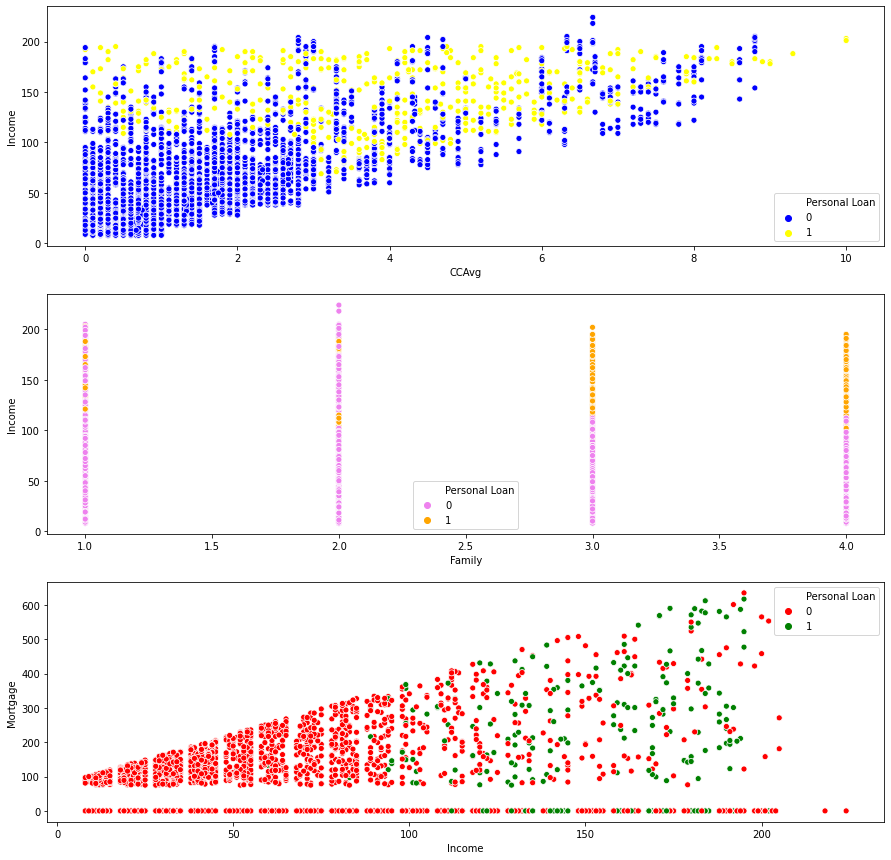

In [33]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(fd.CCAvg, fd.Income, hue = fd['Personal Loan'], palette= ['blue','yellow'])

plt.subplot(3,1,2)
sns.scatterplot(fd.Family, fd.Income, hue = fd['Personal Loan'], palette= ['violet','orange'])

plt.subplot(3,1,3)
sns.scatterplot(fd.Income, fd.Mortgage, hue = fd['Personal Loan'], palette= ['red','green'])

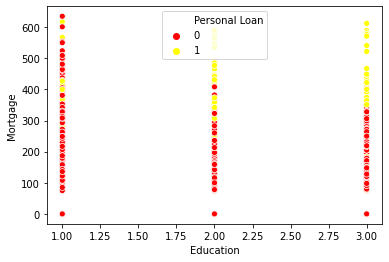

In [34]:
sns.scatterplot(fd.Education, fd.Mortgage, hue = fd['Personal Loan'], palette= ['red','yellow'])

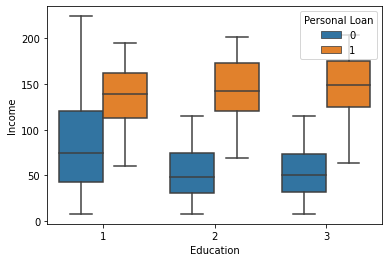

In [35]:
sns.boxplot(x="Education",y="Income",hue="Personal Loan",data=fd)

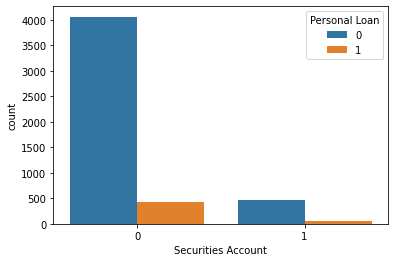

In [36]:
sns.countplot(x="Securities Account",hue="Personal Loan",data=fd)

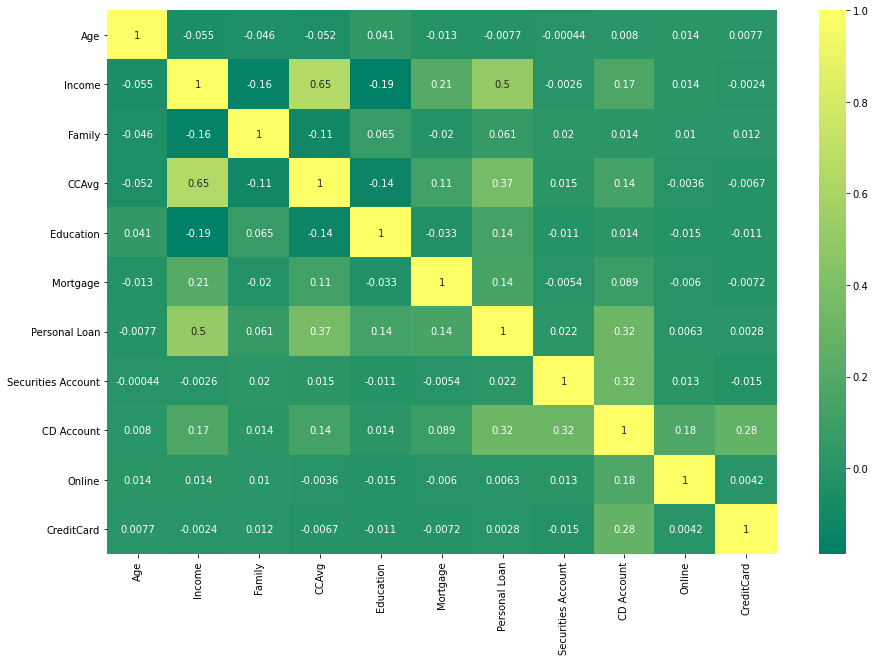

In [37]:
cgrh=plt.subplots(figsize=(15,10))
sns.heatmap(fd.corr(),cmap="summer",annot=True)

## **4.Performing Transformations**

### 4.1 Using powertransformation on "Income" column

AFTER:


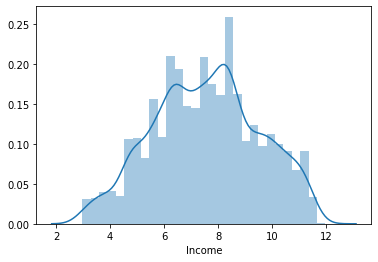

In [38]:
# Income is right-skewed distribution
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(fd["Income"].values.reshape(-1,1))
fd["Income"]=pt.transform(fd["Income"].values.reshape(-1,1))
print("AFTER:")
sns.distplot(fd["Income"])

### 4.2 Applying powertransformation on CCAvg

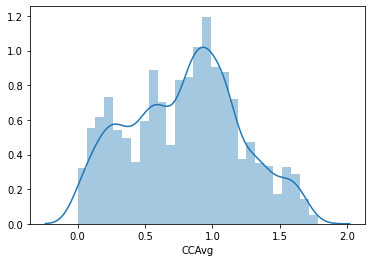

In [39]:
# CCAvg has right-skewed distributon 
pt.fit(fd["CCAvg"].values.reshape(-1,1))
fd["CCAvg"]=pt.transform(fd["CCAvg"].values.reshape(-1,1))
sns.distplot(fd["CCAvg"])

4.3 Transforming Motgage Column

,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,6.827583,4,0.845160,1,0,1,0,0,0,0
1,45,5.876952,3,0.814478,1,0,1,0,0,0,0
2,39,3.504287,1,0.633777,1,0,0,0,0,0,0
3,35,8.983393,1,1.107427,2,0,0,0,0,0,0
4,35,6.597314,4,0.633777,2,0,0,0,0,1,0


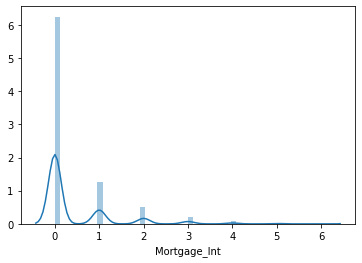

In [40]:
# Mortgage column is higly skewed so making it to groups and recucing its lesser skew
fd["Mortgage_Int"]=pd.cut(fd.Mortgage,bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
fd.drop("Mortgage",axis=1,inplace=True)
sns.distplot(fd["Mortgage_Int"])
fd.head()

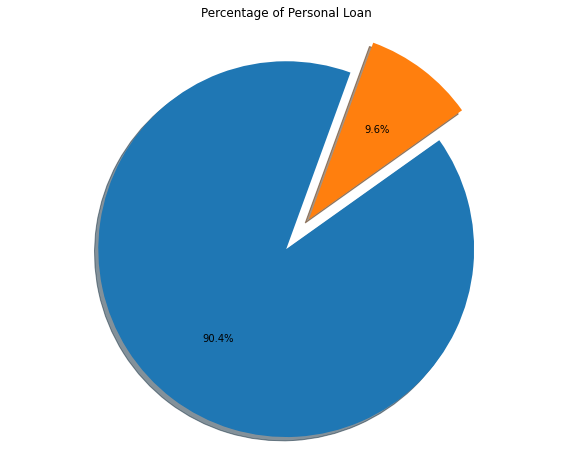

In [41]:
pc=pd.DataFrame(fd["Personal Loan"].value_counts()).reset_index()
pc.columns=["Labels","Personal Loan"]
f1,x1=plt.subplots(figsize=(10,8))
explode=(0,0.20)
x1.pie(pc["Personal Loan"],explode=explode,autopct="%1.1f%%",shadow=True,startangle=70)
x1.axis("equal")
plt.title("Percentage of Personal Loan")
plt.show()

In [42]:
inp=fd.loc[:,fd.columns!="Personal Loan"]
out=fd["Personal Loan"]

## **5. Normalizing the data and splitting the data into 70:30 ratio**

### 5.1 Splitting the data into test ratio of 70:30

In [43]:
# We are spling the data and then we can normalize the variables
# We use stratify method to get equal accuracy of both test and train
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(inp,out,test_size=0.3,stratify=out,random_state=1)
train_x.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
3465,65,6.414718,1,0.928941,2,0,0,0,0,0
4582,25,7.809725,3,0.253539,3,0,0,1,0,0
1922,39,5.149933,1,0.782206,3,0,0,0,0,0
1186,62,6.476599,4,0.712255,2,0,0,1,0,0
3718,45,2.972350,2,0.094128,3,0,0,0,1,0


### 5.2 Reseting the indices

In [44]:
train_x.reset_index(drop=True,inplace=True)
train_y.reset_index(drop=True,inplace=True)
test_x.reset_index(drop=True,inplace=True)
test_y.reset_index(drop=True,inplace=True)
train_x.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,65,6.414718,1,0.928941,2,0,0,0,0,0
1,25,7.809725,3,0.253539,3,0,0,1,0,0
2,39,5.149933,1,0.782206,3,0,0,0,0,0
3,62,6.476599,4,0.712255,2,0,0,1,0,0
4,45,2.972350,2,0.094128,3,0,0,0,1,0


### 5.3 Normalizing the data using StandardScaler method

In [ ]:
from sklearn.preprocessing import StandardScaler
for ind, column in enumerate(train_x.columns):
  scaler=StandardScaler()

  scaler.fit(train_x[[column]])

  np_array=scaler.transform(train_x[[column]])
  train_x.loc[:, column]=pd.Series(np_array.flatten())

  np_array=scaler.transform(test_x[[column]])
  test_x.loc[:, column]=pd.Series(np_array.flatten())

### 5.4 Importing all the needed libraries and restoring the scaled values into test and train

In [46]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
x_train=train_x.values
y_train=train_y.values
x_test=test_x.values
y_test=test_y.values

## **6.Implementing various models on the data**

1.   Logistic Regression
2.   RandomForestCalssifier
3.   KNeighboursClassifer
4.   DesicionTreeClassifier





In [47]:
lr=LogisticRegression(random_state=0)
dtc=DecisionTreeClassifier(random_state=0,max_depth=8)
rfc=RandomForestClassifier(random_state=0,n_estimators=500,max_depth=8)
knn=KNeighborsClassifier(n_neighbors=3)

#For Logistic Regression Model
lr.fit(x_train,y_train.ravel())
yp_test_lr=lr.predict(x_test)
yp_train_lr=lr.predict(x_train)
test_score_lr=accuracy_score(yp_test_lr,y_test)
train_score_lr=accuracy_score(yp_train_lr,y_train)
print("For LogisticRegression Model")
print("For test is:",test_score_lr)
print("For train is:",train_score_lr)

#For RandomForestClassifier Model
rfc.fit(x_train,y_train.ravel())
yp_test_rf=rfc.predict(x_test)
yp_train_rf=rfc.predict(x_train)
test_score_rf=accuracy_score(yp_test_rf,y_test)
train_score_rf=accuracy_score(yp_train_rf,y_train)
print("For RandomForestClassifier Model")
print("For test is:",test_score_rf)
print("For train is:",train_score_rf)
print()

#For KNeighboursClassifier Model
knn.fit(x_train,y_train.ravel())
yp_test_kn=knn.predict(x_test)
yp_train_kn=knn.predict(x_train)
test_score_kn=accuracy_score(yp_test_kn,y_test)
train_score_kn=accuracy_score(yp_train_kn,y_train)
print("For KNeighbouClassifier Model")
print("For test is:",test_score_kn)
print("For train is:",train_score_kn)
print()

#For DesicionTreeClassifier Model
dtc.fit(x_train,y_train.ravel())
yp_test_dt=dtc.predict(x_test)
yp_train_dt=dtc.predict(x_train)
test_score_dt=accuracy_score(yp_test_dt,y_test)
train_score_dt=accuracy_score(yp_train_dt,y_train)
print("For DesicionTreeClassifier Model")
print("For test is:",test_score_dt)
print("For train is:",train_score_dt)
print()


For LogisticRegression Model
For test is: 0.9513333333333334
For train is: 0.9565714285714285
For RandomForestClassifier Model
For test is: 0.9826666666666667
For train is: 0.9948571428571429

For KNeighbouClassifier Model
For test is: 0.9646666666666667
For train is: 0.9805714285714285

For DesicionTreeClassifier Model
For test is: 0.982
For train is: 0.9971428571428571



## **7. Displayng all the model's metrics**

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.82      0.63      0.71       144

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.84      1500
weighted avg       0.95      0.95      0.95      1500

Confusion Matrix


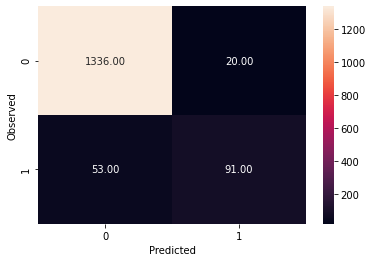

AUC SCORE= 0.8085975909537856
Roc Curve:


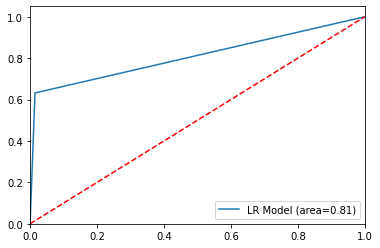

In [48]:
print(classification_report(y_test,yp_test_lr))
print("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,yp_test_lr),annot=True,fmt='.2f')
plt.ylabel('Observed')
plt.xlabel("Predicted")
plt.show()
lr_auc_score=roc_auc_score(y_test,yp_test_lr)
print("AUC SCORE=",lr_auc_score)
print("Roc Curve:")
fpr,tpr,threshold=roc_curve(y_test,yp_test_lr)
plt.plot(fpr,tpr,label='LR Model (area=%0.2f)' % lr_auc_score)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.97      0.85      0.90       144

    accuracy                           0.98      1500
   macro avg       0.98      0.92      0.95      1500
weighted avg       0.98      0.98      0.98      1500

Confusion Matrix


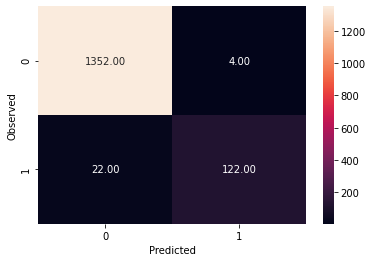

AUC SCORE= 0.9221361848574238
Roc Curve:


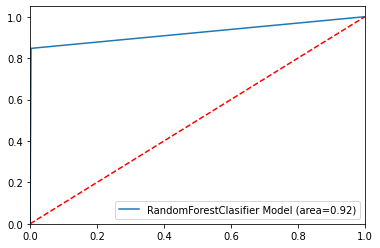

In [49]:
print(classification_report(y_test,yp_test_rf))
print("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,yp_test_rf),annot=True,fmt='.2f')
plt.ylabel('Observed')
plt.xlabel("Predicted")
plt.show()
rf_auc_score=roc_auc_score(y_test,yp_test_rf)
print("AUC SCORE=",rf_auc_score)
print("Roc Curve:")
fpr,tpr,threshold=roc_curve(y_test,yp_test_rf)
plt.plot(fpr,tpr,label='RandomForestClasifier Model (area=%0.2f)' % rf_auc_score)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc="lower right")
plt.show()


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1356
           1       0.95      0.67      0.78       144

    accuracy                           0.96      1500
   macro avg       0.96      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500

Confusion Matrix


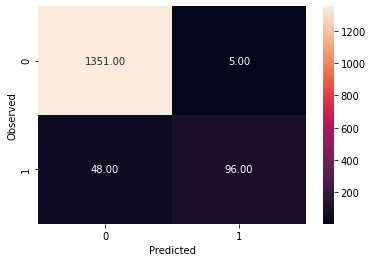

AUC SCORE= 0.8314896755162241
Roc Curve:


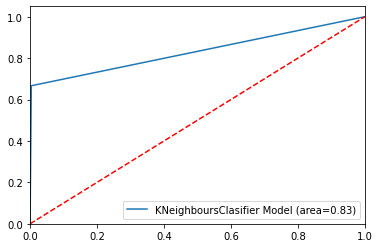

In [50]:
print(classification_report(y_test,yp_test_kn))
print("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,yp_test_kn),annot=True,fmt='.2f')
plt.ylabel('Observed')
plt.xlabel("Predicted")
plt.show()
kn_auc_score=roc_auc_score(y_test,yp_test_kn)
print("AUC SCORE=",kn_auc_score)
print("Roc Curve:")
fpr,tpr,threshold=roc_curve(y_test,yp_test_kn)
plt.plot(fpr,tpr,label='KNeighboursClasifier Model (area=%0.2f)' % kn_auc_score)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.94      0.87      0.90       144

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



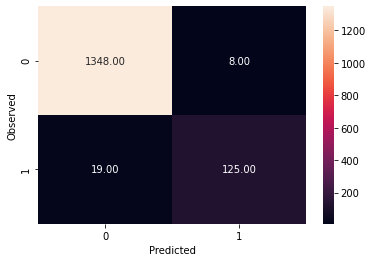

AUC SCORE= 0.9310779252704031
Roc Curve:


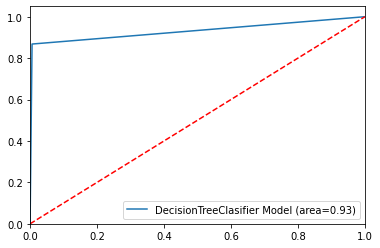

In [51]:
print(classification_report(y_test,yp_test_dt))
sns.heatmap(confusion_matrix(y_test,yp_test_dt),annot=True,fmt='.2f')
plt.ylabel('Observed')
plt.xlabel("Predicted")
plt.show()
dt_auc_score=roc_auc_score(y_test,yp_test_dt)
print("AUC SCORE=",dt_auc_score)
print("Roc Curve:")
fpr,tpr,threshold=roc_curve(y_test,yp_test_dt)
plt.plot(fpr,tpr,label='DecisionTreeClasifier Model (area=%0.2f)' % dt_auc_score)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc="lower right")
plt.show()

## **8.Comparing the performance of implemented algorithms**

LR: 0.955600 (0.009462)
RF: 0.985857 (0.005902)
KNN: 0.955486 (0.008173)
DT: 0.980057 (0.006088)


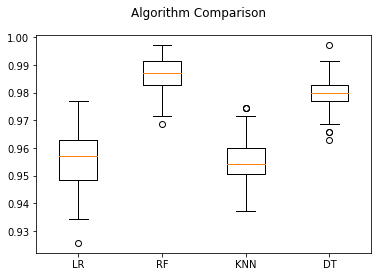

In [52]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold =RepeatedStratifiedKFold(n_splits=10, random_state=12345)
    cv_results =cross_val_score(model, train_x,train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## **9. Summary**


*   They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data.
*   From the above graph , it seems like 'RandomForestClassifier' algorithm have the highest accuracy and we can choose that as our final model.
*   The persons who have personal loan have a higher credit card average.
*   It seems that customers with education level is 1 is having more income which is mere equal to the customers who has taken the personal loan.
*   Customers with education level 2 & 3 seems to take personal loan as they have high mortgage. 
*   Customers who does not have CD account, does not have loan as well, but almost all customers who has CD account has loan as well.

